In [1]:
import pandas as pd
import numpy as np
import sqlite3 as sql 
import seaborn as sns
import plotly.express as px

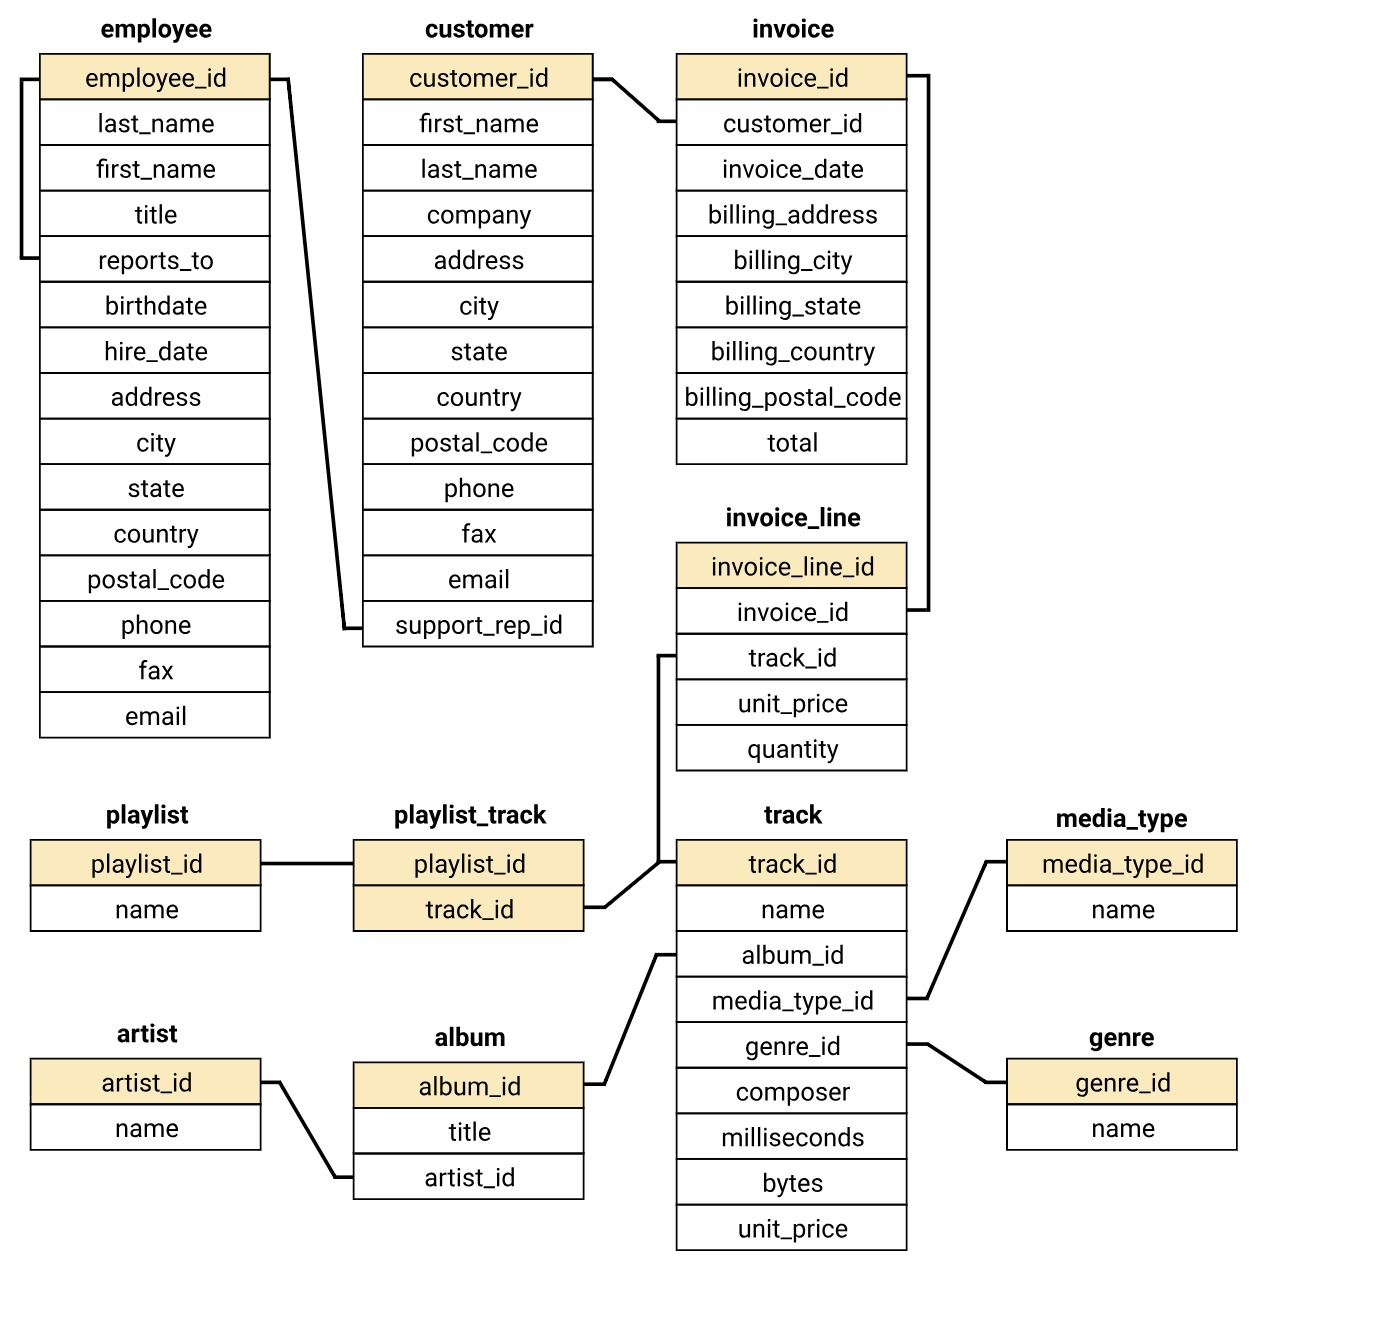

In [2]:
conn = sql.connect("chinook.db")

In [3]:
def read_query(q):
    return pd.read_sql_query(q, conn)

In [4]:
pd.read_sql_query("""select * from sqlite_master where type = "table" """ , conn)

,type,name,tbl_name,rootpage,sql
0,table,album,album,2,CREATE TABLE [album]\n(\n [album_id] INTEGE...
1,table,artist,artist,3,CREATE TABLE [artist]\n(\n [artist_id] INTE...
2,table,customer,customer,4,CREATE TABLE [customer]\n(\n [customer_id] ...
3,table,employee,employee,5,CREATE TABLE [employee]\n(\n [employee_id] ...
4,table,genre,genre,6,CREATE TABLE [genre]\n(\n [genre_id] INTEGE...
5,table,invoice,invoice,7,CREATE TABLE [invoice]\n(\n [invoice_id] IN...
6,table,invoice_line,invoice_line,8,CREATE TABLE [invoice_line]\n(\n [invoice_l...
7,table,media_type,media_type,9,CREATE TABLE [media_type]\n(\n [media_type_...
8,table,playlist,playlist,10,CREATE TABLE [playlist]\n(\n [playlist_id] ...
9,table,playlist_track,playlist_track,11,CREATE TABLE [playlist_track]\n(\n [playlis...


In [5]:
q = """select * from invoice where invoice_id = 1"""

pd.read_sql_query(q,conn)

,invoice_id,customer_id,invoice_date,billing_address,billing_city,billing_state,billing_country,billing_postal_code,total,tax,subtotal
0,1,18,2017-01-03 00:00:00,627 Broadway,New York,NY,USA,10012-2612,15.84,0,15.84


In [6]:
q = """select * from invoice_line where invoice_id = 1"""

pd.read_sql_query(q,conn)

,invoice_line_id,invoice_id,track_id,unit_price,quantity
0,1,1,1158,0.99,1
1,2,1,1159,0.99,1
2,3,1,1160,0.99,1
3,4,1,1161,0.99,1
4,5,1,1162,0.99,1
5,6,1,1163,0.99,1
6,7,1,1164,0.99,1
7,8,1,1165,0.99,1
8,9,1,1166,0.99,1
9,10,1,1167,0.99,1


In [7]:
q = """select sum(unit_price) from invoice_line where invoice_id = 1"""

pd.read_sql_query(q,conn)

,sum(unit_price)
0,15.84


In [8]:
# invoice id , track id , track name , media type, quantity, unit price

q = """select il.invoice_id Invoice_ID , t.track_ID, t.name Track Name , m.name Track_type,
    il.quantity Quantity , il.unit_price
    from invoice_line
    inner join track t
    t.track_id = il.track_id
    inner join media_type m
    t.media_type_id = 
    """

In [9]:
q = """select * from invoice_line il
    join track t
    on 
    il.track_id = t.track_id
    """

pd.read_sql_query(q,conn)

,invoice_line_id,invoice_id,track_id,unit_price,quantity,track_id,name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price
0,1,1,1158,0.99,1,1158,Right Next Door to Hell,91,2,1,None,182321,3175950,0.99
1,2,1,1159,0.99,1,1159,Dust N' Bones,91,2,1,None,298374,5053742,0.99
2,3,1,1160,0.99,1,1160,Live and Let Die,91,2,1,None,184016,3203390,0.99
3,4,1,1161,0.99,1,1161,Don't Cry (Original),91,2,1,None,284744,4833259,0.99
4,5,1,1162,0.99,1,1162,Perfect Crime,91,2,1,None,143637,2550030,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4752,4753,614,2659,0.99,1,2659,Every Breath You Take,215,1,1,G M Sumner,254615,8364520,0.99
4753,4754,614,2660,0.99,1,2660,King Of Pain,215,1,1,G M Sumner,300512,9880303,0.99
4754,4755,614,2661,0.99,1,2661,Wrapped Around Your Finger,215,1,1,G M Sumner,315454,10361490,0.99
4755,4756,614,2662,0.99,1,2662,Don't Stand So Close to Me '86,215,1,1,G M Sumner,293590,9636683,0.99


In [10]:
# employee name, employee title, supervisor name

In [11]:
q = """select * from employee
    """

pd.read_sql_query(q,conn)

,employee_id,last_name,first_name,title,reports_to,birthdate,hire_date,address,city,state,country,postal_code,phone,fax,email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2016-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2016-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2017-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2017-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2017-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,1.0,1973-07-01 00:00:00,2016-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
6,7,King,Robert,IT Staff,6.0,1970-05-29 00:00:00,2017-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,6.0,1968-01-09 00:00:00,2017-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


In [12]:
q = """select e1.first_name ||" "|| e1.last_name Employee_Name,
    e1.title Employee_title , e2.first_name ||" "|| e2.last_name Supervisor_name
    from employee e1
    left join employee e2
    on
    e1.reports_to = e2.employee_id
    """

pd.read_sql_query(q,conn)

,Employee_Name,Employee_title,Supervisor_name
0,Andrew Adams,General Manager,None
1,Nancy Edwards,Sales Manager,Andrew Adams
2,Jane Peacock,Sales Support Agent,Nancy Edwards
3,Margaret Park,Sales Support Agent,Nancy Edwards
4,Steve Johnson,Sales Support Agent,Nancy Edwards
5,Michael Mitchell,IT Manager,Andrew Adams
6,Robert King,IT Staff,Michael Mitchell
7,Laura Callahan,IT Staff,Michael Mitchell


In [13]:
q = """select c.first_name|| ' ' || c.last_name Customer_name,
    count(inv.invoice_id) No_of_invoices, 
    sum(inv.total) Total_Spend 
    from customer c
    left join invoice inv
    on
    c.customer_id = inv.customer_id
    group by 1
    """

pd.read_sql_query(q,conn)

,Customer_name,No_of_invoices,Total_Spend
0,Aaron Mitchell,8,70.29
1,Alexandre Rocha,10,69.30
2,Astrid Gruber,9,69.30
3,Bjørn Hansen,9,72.27
4,Camille Bernard,9,79.20
5,Daan Peeters,7,60.39
6,Dan Miller,12,95.04
7,Diego Gutiérrez,5,39.60
8,Dominique Lefebvre,9,72.27
9,Eduardo Martins,12,60.39


In [14]:
q = """select c.first_name|| ' ' || c.last_name Customer_name,
    c.country Country,
    count(inv.invoice_id) No_of_invoices, 
    sum(inv.total) Total_Spend 
    from customer c
    left join invoice inv
    on
    c.customer_id = inv.customer_id
    group by 1
    order by 3 desc
    """

pd.read_sql_query(q,conn)

,Customer_name,Country,No_of_invoices,Total_Spend
0,František Wichterlová,Czech Republic,18,144.54
1,Madalena Sampaio,Portugal,16,82.17
2,Fernanda Ramos,Brazil,15,106.92
3,Manoj Pareek,India,13,111.87
4,Luís Gonçalves,Brazil,13,108.90
5,Luis Rojas,Chile,13,97.02
6,João Fernandes,Portugal,13,102.96
7,Hugh O'Reilly,Ireland,13,114.84
8,Edward Francis,Canada,13,91.08
9,Richard Cunningham,USA,12,86.13


In [15]:
q = """select c.first_name|| ' ' || c.last_name Customer_name,
    count(inv.invoice_id) No_of_invoices, 
    sum(inv.total) Total_Spend,
    case
        when sum(inv.total) < 40 then "small spender"
        when sum(inv.total) >100 then "Big spender"
        else "Regular"
    end Customer_Category
    from customer c
    left join invoice inv
    on
    c.customer_id = inv.customer_id
    group by 1
    order by 3
    """

pd.read_sql_query(q,conn)

,Customer_name,No_of_invoices,Total_Spend,Customer_Category
0,Mark Philips,10,29.70,small spender
1,Kara Nielsen,10,37.62,small spender
2,Diego Gutiérrez,5,39.60,small spender
3,Robert Brown,4,40.59,Regular
4,Lucas Mancini,9,50.49,Regular
5,Tim Goyer,9,54.45,Regular
6,Daan Peeters,7,60.39,Regular
7,Eduardo Martins,12,60.39,Regular
8,Martha Silk,11,62.37,Regular
9,Marc Dubois,9,64.35,Regular


In [16]:
# playlist_id , playlist_name, no_of_tracks, Total_duration in seconds

In [17]:
q = """select * from track"""

pd.read_sql_query(q,conn)

,track_id,name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99
...,...,...,...,...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,2,24,None,286741,4718950,0.99
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,24,Claudio Monteverdi,66639,1189062,0.99
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,24,Wolfgang Amadeus Mozart,221331,3665114,0.99


In [18]:
q = """select * from track where track_id=1158"""

pd.read_sql_query(q,conn)

,track_id,name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price
0,1158,Right Next Door to Hell,91,2,1,None,182321,3175950,0.99


In [19]:
q = """select * from track"""

pd.read_sql_query(q,conn)

,track_id,name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99
...,...,...,...,...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,2,24,None,286741,4718950,0.99
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,24,Claudio Monteverdi,66639,1189062,0.99
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,24,Wolfgang Amadeus Mozart,221331,3665114,0.99


In [20]:
q = """select * from track where track_id = 1158"""

pd.read_sql_query(q,conn)

,track_id,name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price
0,1158,Right Next Door to Hell,91,2,1,None,182321,3175950,0.99


In [21]:
#track id ke sarey tracks lane he

In [22]:
q = """select * from track"""

pd.read_sql_query(q,conn)

,track_id,name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99
...,...,...,...,...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,2,24,None,286741,4718950,0.99
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,24,Claudio Monteverdi,66639,1189062,0.99
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,24,Wolfgang Amadeus Mozart,221331,3665114,0.99


In [23]:
q = """select t1.track_id , t1.album_id   
    from track t1
    inner join track t2
    on
    t1.album_id = t2.album_id
    where t2.album_id = 92
    """

pd.read_sql_query(q,conn)

,track_id,album_id
0,1174,92
1,1174,92
2,1174,92
3,1174,92
4,1174,92
...,...,...
191,1187,92
192,1187,92
193,1187,92
194,1187,92


In [24]:
q = """select * from invoice"""

pd.read_sql_query(q,conn)

,invoice_id,customer_id,invoice_date,billing_address,billing_city,billing_state,billing_country,billing_postal_code,total,tax,subtotal
0,1,18,2017-01-03 00:00:00,627 Broadway,New York,NY,USA,10012-2612,15.84,0,15.84
1,2,30,2017-01-03 00:00:00,230 Elgin Street,Ottawa,ON,Canada,K2P 1L7,9.90,0,9.90
2,3,40,2017-01-05 00:00:00,"8, Rue Hanovre",Paris,None,France,75002,1.98,0,1.98
3,4,18,2017-01-06 00:00:00,627 Broadway,New York,NY,USA,10012-2612,7.92,0,7.92
4,5,27,2017-01-07 00:00:00,1033 N Park Ave,Tucson,AZ,USA,85719,16.83,0,16.83
...,...,...,...,...,...,...,...,...,...,...,...
609,610,55,2020-12-21 00:00:00,421 Bourke Street,Sidney,NSW,Australia,2010,6.93,0,6.93
610,611,52,2020-12-27 00:00:00,202 Hoxton Street,London,None,United Kingdom,N1 5LH,1.98,0,1.98
611,612,33,2020-12-27 00:00:00,5112 48 Street,Yellowknife,NT,Canada,X1A 1N6,11.88,0,11.88
612,613,20,2020-12-29 00:00:00,541 Del Medio Avenue,Mountain View,CA,USA,94040-111,8.91,0,8.91


In [25]:
q = """select * from invoice where billing_city = "New York" """

pd.read_sql_query(q,conn)

,invoice_id,customer_id,invoice_date,billing_address,billing_city,billing_state,billing_country,billing_postal_code,total,tax,subtotal
0,1,18,2017-01-03 00:00:00,627 Broadway,New York,NY,USA,10012-2612,15.84,0,15.84
1,4,18,2017-01-06 00:00:00,627 Broadway,New York,NY,USA,10012-2612,7.92,0,7.92
2,9,18,2017-01-18 00:00:00,627 Broadway,New York,NY,USA,10012-2612,8.91,0,8.91
3,50,18,2017-04-02 00:00:00,627 Broadway,New York,NY,USA,10012-2612,6.93,0,6.93
4,187,18,2018-02-18 00:00:00,627 Broadway,New York,NY,USA,10012-2612,6.93,0,6.93
5,372,18,2019-06-01 00:00:00,627 Broadway,New York,NY,USA,10012-2612,13.86,0,13.86
6,448,18,2019-11-27 00:00:00,627 Broadway,New York,NY,USA,10012-2612,9.90,0,9.90
7,486,18,2020-03-05 00:00:00,627 Broadway,New York,NY,USA,10012-2612,8.91,0,8.91


In [26]:
q = """select t1.track_id , t1.album_id   
    from track t1
    inner join track t2
    on
    t1.album_id = t2.album_id
    where t2.album_id = 92
    """

pd.read_sql_query(q,conn)

,track_id,album_id
0,1174,92
1,1174,92
2,1174,92
3,1174,92
4,1174,92
...,...,...
191,1187,92
192,1187,92
193,1187,92
194,1187,92


In [27]:
q = """select inv1.billing_address , inv1.billing_city 
    from invoice inv1
"""
pd.read_sql_query(q,conn)

,billing_address,billing_city
0,627 Broadway,New York
1,230 Elgin Street,Ottawa
2,"8, Rue Hanovre",Paris
3,627 Broadway,New York
4,1033 N Park Ave,Tucson
...,...,...
609,421 Bourke Street,Sidney
610,202 Hoxton Street,London
611,5112 48 Street,Yellowknife
612,541 Del Medio Avenue,Mountain View


In [28]:
q = """select inv1.billing_address , inv1.billing_city 
    from invoice inv1
     inner join invoice inv2
    on
    inv1.billing_address = inv2.billing_city
    where inv2.billing_city = "NEW YORK"
"""
pd.read_sql_query(q,conn)

,billing_address,billing_city


In [29]:
q = """select c.first_name|| ' ' || c.last_name Customer_name,
    count(inv.invoice_id) No_of_invoices, 
    sum(inv.total) Total_Spend,
    case
        when sum(inv.total) < 40 then "small spender"
        when sum(inv.total) >100 then "Big spender"
        else "Regular"
    end Customer_Category
    from customer c
    left join invoice inv
    on
    c.customer_id = inv.customer_id
    group by 1
    order by 3
    """

pd.read_sql_query(q,conn)

,Customer_name,No_of_invoices,Total_Spend,Customer_Category
0,Mark Philips,10,29.70,small spender
1,Kara Nielsen,10,37.62,small spender
2,Diego Gutiérrez,5,39.60,small spender
3,Robert Brown,4,40.59,Regular
4,Lucas Mancini,9,50.49,Regular
5,Tim Goyer,9,54.45,Regular
6,Daan Peeters,7,60.39,Regular
7,Eduardo Martins,12,60.39,Regular
8,Martha Silk,11,62.37,Regular
9,Marc Dubois,9,64.35,Regular


In [30]:
q = """select inv.billing_address|| ' ' || inv.billing_city Address, 
    count(inv.billing_state) Total_purchaser_state , inv.billing_country
    from invoice inv
    left join invoice inv1
    on
    inv.billing_address = inv1.billing_city
    group by 3
    order by 2 desc
    """

pd.read_sql_query(q,conn)

,Address,Total_purchaser_state,billing_country
0,627 Broadway New York,131,USA
1,230 Elgin Street Ottawa,76,Canada
2,"Av. Brigadeiro Faria Lima, 2170 São José dos C...",61,Brazil
3,"8, Rue Hanovre Paris",50,France
4,Barbarossastraße 19 Berlin,41,Germany
5,Klanova 9/506 Prague,30,Czech Republic
6,"Rua dos Campeões Europeus de Viena, 4350 Porto",29,Portugal
7,113 Lupus St London,28,United Kingdom
8,"3,Raj Bhavan Road Bangalore",21,India
9,3 Chatham Street Dublin,13,Ireland


In [31]:
q = """select inv.billing_address,inv.billing_city
    from invoice inv
    """

pd.read_sql_query(q,conn)

,billing_address,billing_city
0,627 Broadway,New York
1,230 Elgin Street,Ottawa
2,"8, Rue Hanovre",Paris
3,627 Broadway,New York
4,1033 N Park Ave,Tucson
...,...,...
609,421 Bourke Street,Sidney
610,202 Hoxton Street,London
611,5112 48 Street,Yellowknife
612,541 Del Medio Avenue,Mountain View


In [32]:
q = """select inv.billing_address|| ' ' || inv.billing_city Address, 
    count(inv.billing_state) Total_purchaser_state , inv.billing_country
    from invoice inv
    inner join invoice inv1
    on
    inv.billing_address = inv1.billing_address
    group by 3
    order by 2 desc
    """

pd.read_sql_query(q,conn)

,Address,Total_purchaser_state,billing_country
0,627 Broadway New York,1351,USA
1,230 Elgin Street Ottawa,776,Canada
2,"Av. Brigadeiro Faria Lima, 2170 São José dos C...",759,Brazil
3,"8, Rue Hanovre Paris",508,France
4,Klanova 9/506 Prague,468,Czech Republic
5,"Rua dos Campeões Europeus de Viena, 4350 Porto",425,Portugal
6,Barbarossastraße 19 Berlin,423,Germany
7,113 Lupus St London,266,United Kingdom
8,"3,Raj Bhavan Road Bangalore",233,India
9,3 Chatham Street Dublin,169,Ireland


In [33]:
q = """select inv.billing_address, inv.billing_city , 
    inv.billing_state, inv.billing_country
    from invoice inv
    inner join invoice inv1
    on
    inv.billing_address = inv1.billing_address
    """

pd.read_sql_query(q,conn)

,billing_address,billing_city,billing_state,billing_country
0,627 Broadway,New York,NY,USA
1,627 Broadway,New York,NY,USA
2,627 Broadway,New York,NY,USA
3,627 Broadway,New York,NY,USA
4,627 Broadway,New York,NY,USA
...,...,...,...,...
6701,113 Lupus St,London,None,United Kingdom
6702,113 Lupus St,London,None,United Kingdom
6703,113 Lupus St,London,None,United Kingdom
6704,113 Lupus St,London,None,United Kingdom


In [34]:
q = """select inv.billing_address,inv.billing_city, 
    inv.billing_state , inv.billing_country, inv.billing_postal_code
    from invoice inv
    group by 2
    """

pd.read_sql_query(q,conn)

,billing_address,billing_city,billing_state,billing_country,billing_postal_code
0,Lijnbaansgracht 120bg,Amsterdam,VV,Netherlands,1016
1,"3,Raj Bhavan Road",Bangalore,None,India,560001
2,Barbarossastraße 19,Berlin,None,Germany,10779
3,"9, Place Louis Barthou",Bordeaux,None,France,33000
4,69 Salem Street,Boston,MA,USA,2113
5,Qe 7 Bloco G,Brasília,DF,Brazil,71020-677
6,Grétrystraat 63,Brussels,None,Belgium,1000
7,Erzsébet krt. 58.,Budapest,None,Hungary,H-1073
8,307 Macacha Güemes,Buenos Aires,None,Argentina,1106
9,162 E Superior Street,Chicago,IL,USA,60611


In [35]:
q = """select * from invoice_line il
    """
read_query(q)

,invoice_line_id,invoice_id,track_id,unit_price,quantity
0,1,1,1158,0.99,1
1,2,1,1159,0.99,1
2,3,1,1160,0.99,1
3,4,1,1161,0.99,1
4,5,1,1162,0.99,1
...,...,...,...,...,...
4752,4753,614,2659,0.99,1
4753,4754,614,2660,0.99,1
4754,4755,614,2661,0.99,1
4755,4756,614,2662,0.99,1


In [36]:
q ="""
WITH usa_tracks AS    
    (
     SELECT t.genre_id AS genre_id, il.invoice_line_id
        FROM track as t
       INNER JOIN invoice_line as il ON il.track_id=t.track_id
       INNER JOIN invoice as i ON i.invoice_id = il.invoice_id
       WHERE i.billing_country = 'USA'
    )
       
SELECT g.name genre_name,
       COUNT(usa.genre_id) num_purchases,
       ROUND((CAST(COUNT(usa.genre_id) AS FLOAT)/ (SELECT COUNT(genre_id)
       FROM usa_tracks))*100,2) AS percentage_sold

FROM usa_tracks AS usa
INNER JOIN genre as g ON g.genre_id = usa.genre_id

GROUP BY g.name
ORDER BY num_purchases DESC
"""
df = read_query(q)
df

,genre_name,num_purchases,percentage_sold
0,Rock,561,53.38
1,Alternative & Punk,130,12.37
2,Metal,124,11.80
3,R&B/Soul,53,5.04
4,Blues,36,3.43
5,Alternative,35,3.33
6,Pop,22,2.09
7,Latin,22,2.09
8,Hip Hop/Rap,20,1.90
9,Jazz,14,1.33


C:\Users\Dell\AppData\Local\Temp\ipykernel_4304\3984092153.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(df["genre_name"], fontsize = 10.5, color= 'grey')


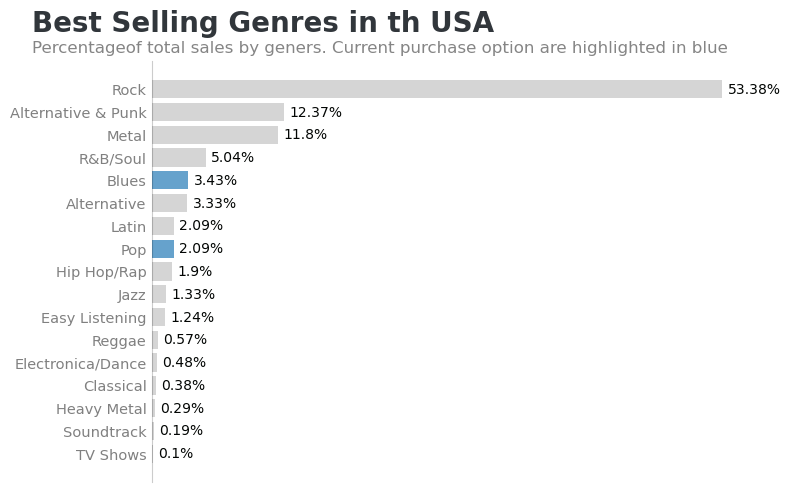

In [37]:
import matplotlib.pyplot as plt

# Sorting the DataFrame by percentage sold
df = df.sort_values(by="percentage_sold")

#Creating a color map to identify ket albums of intrest
album_options = ['Hip Hop/Rop',"Alternatice & Punk","Blues","Pop"]
cmap = df["genre_name"].apply(lambda x: '#0064AB' if x in album_options else '#BABABA')

#Creating the bar plot 

fig, ax = plt.subplots(figsize= (8,5)) #Adjust figure size
bars = ax.barh(df['genre_name'], df['percentage_sold'], height = 0.8 , color=cmap, alpha = 0.6)

#Adding text and adjusting widht of bars
for bar, percentage in zip(bars,df['percentage_sold']):
    ax.text(bar.get_width()+0.5, bar.get_y()+ bar.get_height()/2,f'{percentage}%',va = 'center', ha='left', fontsize=10, color = '#020503')

# Customizing axes and layout
ax.set_yticklabels(df["genre_name"], fontsize = 10.5, color= 'grey')
ax.set_xticks([])
plt.text(-0.2,1.07, 'Best Selling Genres in th USA', fontsize=20, fontweight="bold", color='#31363b', transform= plt.gca().transAxes)
plt.text(-0.2,1.02, 'Percentageof total sales by geners. Current purchase option are highlighted in blue', fontsize=12, color='#858585', transform= plt.gca().transAxes)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

#Adjusting Left spine capacity

ax.spines['left'].set_color('#000000')
ax.spines['left'].set_alpha(0.2)

#Removing y-axis tick parameter
ax.tick_params(axis='y',which = 'both', length = 0)

plt.tight_layout()
plt.show()

### Results

Based on the genre sales pattern in the USA. Chinook should select these options from the list of available albums.
 

* **Punk:** Red tone
* **Blues:** Slim Jim Bites
* **Pop:** Meteor on the Girls

It's worth nothing that these three genres only makeup **17%** of total sales. To maximize profitability, the company should be on the look out for the Rock songs since they account for **53%** of sales in the US market.

   ## Employee Sales Performance Analysis

### The Situation

After an initial purchase, each Chinook customer is assigned to a sales support agent, the company asked us to analyze purchase from customer belonging to each sales agent, they want to know if some agents are performing better or worse than others.

## Analysis

To answer this question. We need to extract the names of the sales executives, their hire dates, the number of account they handle, and the total purchases made by these accounts, we will also compute the average sales for each account that the sales executives manage.


In [38]:
q ="""
     WITH t1 AS (SELECT em.first_name ||" "|| em.last_name AS sales_rep_name,
                        em.hire_date,
                        COUNT(cu.customer_id) AS num_invoices,
                        CAST(SUM(iv.total) AS Integer) AS total_sales
                   FROM employee em
                   JOIN customer cu
                      ON em.employee_id = cu.support_rep_id
                   JOIN invoice iv
                      ON iv.customer_id = cu.customer_id
                   GROUP BY 1
                   ORDER BY 4 DESC)
                
                   
     SELECT *,
             ROUND(CAST(total_sales AS Float) / num_invoices, 2)
                AS sales_per_customer
        FROM t1;
    
    """
     
df = read_query(q)
df

,sales_rep_name,hire_date,num_invoices,total_sales,sales_per_customer
0,Jane Peacock,2017-04-01 00:00:00,212,1731,8.17
1,Margaret Park,2017-05-03 00:00:00,214,1584,7.40
2,Steve Johnson,2017-10-17 00:00:00,188,1393,7.41


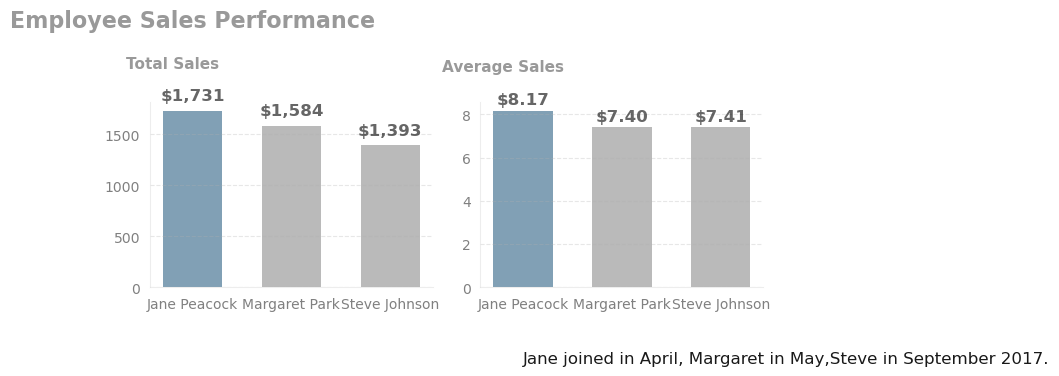

In [39]:
import matplotlib.pyplot as plt

# Data
sales_rep_name = df["sales_rep_name"].values
total_sales= df["total_sales"].values
sales_per_customer = df["sales_per_customer"].values


#Create subplots

fig, axes = plt.subplots(nrows= 1,ncols=2, figsize= (10,8))

# Total sales chart
axes[0].bar(sales_rep_name, total_sales,color="#BABABA",width= 0.6)
axes[0].bar(sales_rep_name[0], total_sales[0] , color="#0064AB", alpha=0.3, width= 0.6)

# Total sales chart label
axes[0].text(x=-0.2,y=2150,s='Total Sales',size = 11,fontweight= 'bold', alpha=0.4, ha= 'center')


#Total sales annoations
for sales, index in zip(total_sales, range(3)):
    axes[0].text(x=index, y=sales+100, s='${:,}'.format(sales),ha='center',
                 fontweight='bold',alpha=0.6,size=12)
    
# Main chart title

axes[0].text(x=-0,y=2550,s='Employee Sales Performance',size = 16,fontweight= 'bold', alpha=0.4, ha= 'center')

# Average sales chart

axes[1].bar(sales_rep_name, sales_per_customer ,color="#BABABA",width= 0.6)
axes[1].bar(sales_rep_name[0], sales_per_customer[0] , color="#0064AB", alpha=0.3, width= 0.6)

# Average sales chart label
axes[1].text(x=-0.2,y=10,s='Average Sales',size = 11,fontweight= 'bold', alpha=0.4, ha= 'center')

#Average sales annoations
for sales, index in zip(sales_per_customer, range(3)):
    axes[1].text(x=index, y=sales+0.3, s='${:,.2f}'.format(sales),ha='center',
                 fontweight='bold',alpha=0.6,size=12)
    
#Footnote

axes[1].text(x=0, y=-3.5, s="Jane joined in April, Margaret in May,Steve in September 2017.",
             size=12, alpha=0.9)

#Common attributesto both charts

for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#DDD')
    ax.spines['left'].set_alpha(0.5)
    ax.spines['bottom'].set_color('#DDD')
    ax.spines['bottom'].set_alpha(0.5)
    
    ax.tick_params(left=False, bottom=False, labelsize=10, labelcolor= 'grey')
    ax.grid(axis='y',linestyle='--',alpha=0.3)


plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

**Results**

* Of the three sales employees, Jane achieved the highest total sales of **1,731 dollars**. Margaret Park comes second, and Steve occupies the last place with **1,393 dollars** in sales. This difference in sales is understandable, considering that Jane and Margaret were employed about **five** months before Steve.

* Jane’s average sales numbers support her leading position. She has achieved **8.17 dollars** in sales per customers, the highest of the three employees. Steve also performs marginally better than Margaret despite the difference in their employment dates.


**Sales by Country**

**The Situation**

**Analysis**

To answer this question. We will write a query that collates data on purchases from different countries. For each country, we will include the total number of customers, total sales values, average sales per customer, and the average order value. Where a country has only one customer, we will collect it into an “Other” group.

In [40]:
q="""
    --Collect the number of customers in each country
    WITH t1 AS( SELECT country, COUNT(customer_id) AS num_customers
                 FROM customer
                GROUP BY country 
             ),
             
             
    --Collect the total sales in each country
        t2 AS( SELECT cu.country,
                      ROUND(SUM(iv.total),2)  AS total_sales,
                      COUNT(iv.invoice_id) AS num_sales
                 FROM customer cu
                 JOIN invoice iv
                   ON cu.customer_id = iv.customer_id
                GROUP BY 1
             ),
             
    
    --Groups Countries with only one customer as "Others"
        t3 AS( SELECT CASE WHEN t1.num_customers = 1 THEN 'Others'
                           ELSE t1.country END AS countries,
                      SUM(t1.num_customers) AS num_customers,
                      SUM(t2.total_sales) AS total_sales,
                      SUM(t2.num_sales) AS num_sales
                 FROM t1
                 JOIN t2
                   ON t1.country = t2.country
                GROUP BY 1
             )
    
    --Calculate relevant sales metrics
    SELECT countries,
           num_customers,
           total_sales,
           ROUND(total_sales / num_sales, 2) AS avg_order_value,
           ROUND(total_sales / num_customers, 2) AS sales_per_customer
      FROM (
              SELECT *,
                  CASE WHEN countries = 'Others' THEN 1
                           ELSE 0 END AS sort
                FROM t3
            )
      ORDER  BY sort, num_customers DESC
    
                
  """
df = read_query(q)

In [41]:
df

,countries,num_customers,total_sales,avg_order_value,sales_per_customer
0,USA,13,1040.49,7.94,80.04
1,Canada,8,535.59,7.05,66.95
2,Brazil,5,427.68,7.01,85.54
3,France,5,389.07,7.78,77.81
4,Germany,4,334.62,8.16,83.66
5,United Kingdom,3,245.52,8.77,81.84
6,Czech Republic,2,273.24,9.11,136.62
7,India,2,183.15,8.72,91.58
8,Portugal,2,185.13,6.38,92.57
9,Others,15,1094.94,7.45,73.00


In [42]:
# Additional Calculation
avg_cust_purchase = df.sales_per_customer.mean()
print(avg_cust_purchase)
df['percent_customers']= round(100*df.num_customers/df.num_customers.sum(),1)
df['percent_sales']=round(100*df.total_sales/df.total_sales.sum(),1)
df['cust_purchase_diff'] = round(100*(df.sales_per_customer-avg_cust_purchase)/avg_cust_purchase,2)


86.96100000000001


In [43]:
df

,countries,num_customers,total_sales,avg_order_value,sales_per_customer,percent_customers,percent_sales,cust_purchase_diff
0,USA,13,1040.49,7.94,80.04,22.0,22.1,-7.96
1,Canada,8,535.59,7.05,66.95,13.6,11.4,-23.01
2,Brazil,5,427.68,7.01,85.54,8.5,9.1,-1.63
3,France,5,389.07,7.78,77.81,8.5,8.3,-10.52
4,Germany,4,334.62,8.16,83.66,6.8,7.1,-3.80
5,United Kingdom,3,245.52,8.77,81.84,5.1,5.2,-5.89
6,Czech Republic,2,273.24,9.11,136.62,3.4,5.8,57.10
7,India,2,183.15,8.72,91.58,3.4,3.9,5.31
8,Portugal,2,185.13,6.38,92.57,3.4,3.9,6.45
9,Others,15,1094.94,7.45,73.00,25.4,23.2,-16.05


In [44]:
136.62-86.96100000000001

49.65899999999999

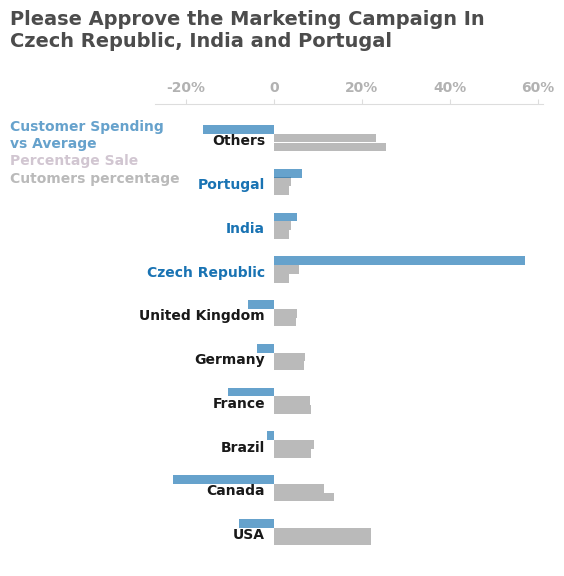

In [45]:
# Visualization
y_labs = df.countries.values
y_axes = np.arange(df.countries.size)

fig = plt.figure(figsize= (5,6))
plt.barh(y_axes-0.3,df.percent_customers,height=0.2,color='#BABABA')
plt.barh(y_axes-0.1,df.percent_sales,height=0.2,color='#BABABA')
plt.barh(y_axes+0.1,df.cust_purchase_diff,height=0.2,color='#0064AB',alpha=0.6)

color_map = ['','','','','','','Yes','Yes','Yes','']

#Annoatet y axis ticks
for loc, label,color in zip(y_axes, y_labs,color_map):
    if color =="Yes":
        plt.text(x=-2,y=loc-0.25, s=label,ha='right', color="#0064AB",
                alpha=0.9, size=10,fontweight="bold")
    else:
        plt.text(x=-2,y=loc-0.25, s=label,ha='right',alpha=0.9, size=10,fontweight="bold")

#Set plot legend
plt.text(x=-60,y=8.7, s="Customer Spending\nvs Average", color='#0064AB',
        size=10,alpha=0.6,fontweight='bold')
plt.text(x=-60,y=8.3, s="Percentage Sale", color='#BABA',size=10,fontweight='bold')
plt.text(x=-60,y=7.9, s="Cutomers percentage", color='#BABABA',size=10,fontweight='bold')

#Set plot title
plt.text(x=-60,y=11, s="Please Approve the Marketing Campaign In\nCzech Republic, India and Portugal",
         alpha=0.7,size=14,fontweight='bold')

for ax in fig.get_axes():
    plt.sca(ax)
    sns.despine(left=True,bottom=True,top=False)
    ax.tick_params(left=False ,bottom= False ,color="#ddd")
    ax.xaxis.set_ticks_position('top')
    ax.spines['top'].set_color('#DDD')
    plt.yticks([])
    plt.xticks([-20,0,20,40,60],['-20%', '0', '20%','40%','60%'],
              size=10,alpha=0.3,fontweight='bold')

### Results

* The Majority of Chinook sales arise from **US** and **Canada**. These two countries dominate in customer base as well as sales. However, customers spend lesser per invoice in these countries.
* Although the **Czech Republic, Portugal, and India** record fewer customers and lesser sales values, customer spend more per invoice than in other countries. To increase revenue from these three markets, Chinook could run marketing campaigns to expend its customer base.


Since the data from each country are relatively few, the initial marketing campaigns should be small. They should aim to collect and analyze customer data so that the right trends are confidently identified.


### How Many Tracks Never Sell?

To answer this question, we will have to distinguish between the entire inventory of track in the ``track`` table and the distinct instances of tracks from the ``invoice_line table.``

In [46]:
q ="""WITH all_and_purchased AS    
    (
     SELECT t.track_id all_tracks, il.track_id AS purchased_tracks
        FROM track as t
       LEFT JOIN invoice_line as il ON il.track_id=t.track_id
    )
       
SELECT COUNT(DISTINCT a.all_tracks) total_tracks,
       COUNT(DISTINCT a.purchased_tracks) tracks_purchased,
       COUNT(DISTINCT a.all_tracks) - COUNT(DISTINCT a.purchased_tracks) not_purchased,
       ROUND(COUNT(DISTINCT a.purchased_tracks) / CAST(COUNT(DISTINCT a.all_tracks) AS float),2) percnet_purchaed
FROM all_and_purchased AS a;"""
purchased = read_query(q)
purchased

,total_tracks,tracks_purchased,not_purchased,percnet_purchaed
0,3503,1806,1697,0.52


In [47]:
purchased = purchased.T
purchased = purchased.iloc[[1,2],0]
purchased_list = purchased.tolist()

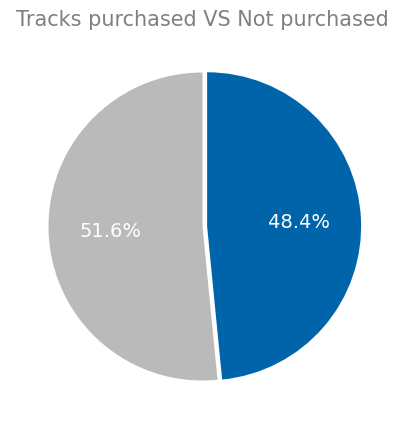

In [48]:
# Plot 
plt.pie(purchased_list,
        explode=(0,0.03),
        startangle=90,
        autopct='%1.1f%%',
        textprops={'fontsize':14,'color':'white'},
        colors=('#BABABA','#0064AB')
)
#Plot Aesthetics
plt.title("Tracks purchased VS Not purchased", fontsize=15,color='gray')
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show()

#### Observations
* Surprisingly, almost half of the track inventory at Chinook has not sold. Lets take a look at the bottom performers and see of we can learn more:

In [49]:
q="""
SELECT ar.name artist_name, g.name genre, COUNT(il.track_id) units_sold
FROM track t
LEFT JOIN invoice_line il ON il.track_id = t.track_id
INNER JOIN album al ON al.album_id = t.album_id
INNER JOIN artist ar ON ar.artist_id = al.artist_id
INNER JOIN genre as g ON g.genre_id = t.genre_id
GROUP BY artist_name
HAVING units_sold = 0
ORDER BY units_sold;
"""
read_query(q)

,artist_name,genre,units_sold
0,Aaron Copland & London Symphony Orchestra,Classical,0
1,Academy of St. Martin in the Fields Chamber En...,Classical,0
2,"Academy of St. Martin in the Fields, John Birc...",Classical,0
3,"Academy of St. Martin in the Fields, Sir Nevil...",Classical,0
4,Adrian Leaper & Doreen de Feis,Classical,0
...,...,...,...
69,The Office,TV Shows,0
70,The Tea Party,Alternative & Punk,0
71,Ton Koopman,Classical,0
72,Toquinho & Vinícius,Bossa Nova,0


#### ``Observations``
74 artists have not sold any units, with most of these tracks belonging to the classical music genre.
Half of the company's inventory remains unsold, potentially trying up woeking capital without generating returns. 
Depending on the payment arrangement with record labels, there are two scenarios to consider:

1. If Chinook pays a fixed fee to host these tracks, it might be wise to focus on more popular genres and discontinues signing less succesful artists.

2. If Chinook pays the record label based on sales percentage, there is little downside to keeping the tracks in the store.

Regardless of the scenario, Chinook should explore ways to promote these low-selling artists. Suggestions could be integrated into the purchasing process or displayed on the website's cart page to increase exposure.

#### `` Albums VS Individual Tracks``

The Chinook store allows customers to buy music in two ways: either album or as individual track. However individuals cant buy a full album then add individual tracks to the same purchase unless they select each track manually.When customer purchase albums, they are charged the same price as if they had bought each track seperately.

Management is contemplating a new purchasing approach to cut costs. Instead of buying every track on album, they are considering purchasing only the most popular tracks from each album from record companies.

In [52]:
q = """

WITH invoice_data AS
    (
    SELECT invoice_id, MIN(track_id) track_id
    FROM invoice_line
    GROUP BY 1
    ),
    
Album_purchased AS
(
    SELECT invoice_id,
    Case
        When
        (
            SELECT t2.track_id
            FROM track t1
            JOIN track t2
            ON
            t1.album_id = t2.album_id
            WHERE t1.track_id = invd.track_id
            
            Except
            
            SELECT il.track_id
            FROM invoice_line il
            WHERE il.invoice_id = invd.invoice_id
        ) IS NULL
        
        AND
        (
            SELECT il.track_id
            FROM invoice_line il
            WHERE il.invoice_id = invd.invoice_id
        
            Except
            
            SELECT t2.track_id
            FROM track t1
            JOIN track t2
            ON
            t1.album_id = t2.album_id
            WHERE t1.track_id = invd.track_id
        ) IS NULL
        
        
        Then 'YES'
        ELSE "NO"
        END AS Purchased_Album
    FROM invoice_data invd
)
SELECT Purchased_Album,
       COUNT(invoice_id ) AS no_of_invoices,
       CAST(COUNT(invoice_id) AS FLOAT) * 100 /
       (SELECT COUNT(*) FROM Album_purchased) AS percent

FROM Album_purchased
GROUP BY 1


"""

read_query(q)

,Purchased_Album,no_of_invoices,percent
0,NO,500,81.433225
1,YES,114,18.566775


### `Results`

Most purchases (81%) from the store are individual tracks. However, in about 19% of cases, customers buy entries album. Chinook should be careful with purchasing only the most popular tracks since it risks losing revenue from customers purchased who purchase entire albums.

### Conclusion and Recommendations

Throughout this project, we have provided insights and recommendations to help a fictional company enhance its profitability. By addressing various business scenarios, we’ve offered guidance on different aspects of the company’s operation.

* **Genre Selection for New Album:** Our analysis suggest that Chinook should prioritize genre with high popularity in the USA. We recommend selecting albums from Hip-Hop, Punk, and Pop genres, as they show promising sales potential. Additionally, keeping an eye on Rock songs, which constitute the majority of sales in the USA, could further boost revenue.
* **Employee Performance:** Among the sales representative, Jane Peacock stands out as the top performer. While Steve Johnson appears to have lower total sales, it’s important to note that he joined the team later than the others. Thus, he may require additional support and training to reach his full potential.
* **Sales Analysis by Country:** While the USA and Canada have the largest customer base, customers in these countries tend to spend less per transaction. On the other hand, the Czech Republic, India, and Portugal show higher average spending per customer. Launching targeted marketing campaigns in these regions could attract more customers and increase sales.

* **Track Purchasing Strategy:** Chinook’s plan to focus solely on popular tracks may seem appealing, but it risks alienating customer who prefer to purchase entire albums. Conducting customer survey and gathering feedback before implementing any changes would provide valuable insights into customer preferences.


In conclusion, by heeding these recommendations and staying attuned to customer need and market trends, Chinook can optimize its operations, enhance customers satisfaction, and ultimately drive sustainable growth and profitability.